In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 128
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 1009 		 0.1 		 0.1 |
| 1643 		 0.1 		 0.1 |
| 1199 		 0.1 		 0.1 |
| 1203 		 0.1 		 0.1 |
| 1004 		 0.1 		 0.1 |
| 1045 		 0.1 		 0.1 |
| 1329 		 0.1 		 0.1 |
| 1172 		 0.1 		 0.1 |
| 1223 		 0.1 		 0.1 |
| 1132 		 0.1 		 0.1 |
| 1076 		 0.1 		 0.1 |
| 1207 		 0.1 		 0.1 |
| 1296 		 0.1 		 0.1 |
| 1008 		 0.1 		 0.1 |
| 1024 		 0.1 		 0.1 |
| 1295 		 0.1 		 0.1 |
| 1002 		 0.1 		 0.1 |
| 1099 		 0.1 		 0.1 |
| 1001 		 0.1 		 0.1 |
-------------------------------------
The s.d. of M is: 115.0
The s.d. of E is: 0.0
The s.d. of I is: 0.0
-------------------------------------
The mean of M is: 1122
The mean of E is: 0.1
The mean of I is: 0.1
-------------------------------------


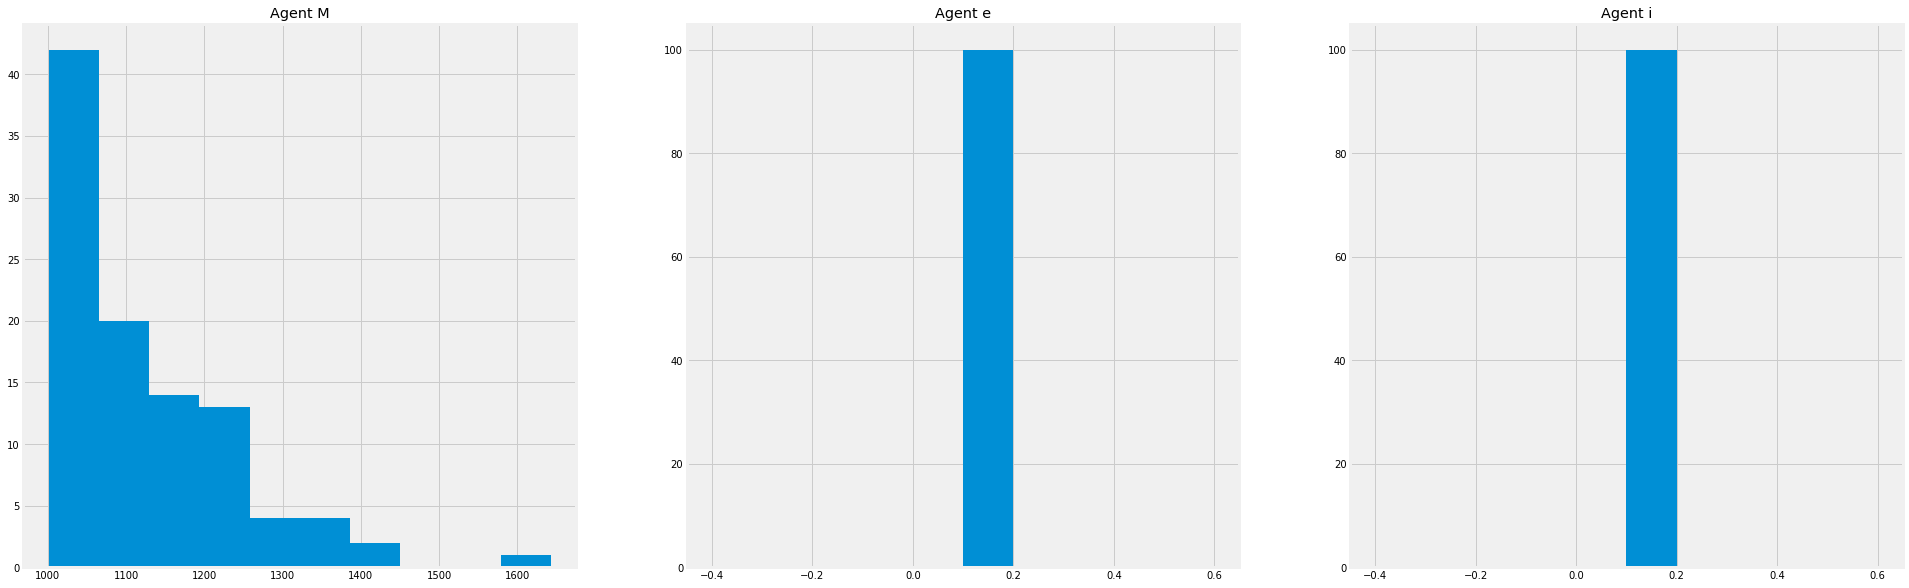

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 148.0, Temptation: 164.0, Sucker: -16.0, Punishment: 0
Agent 1 playing Agent 0: Reward: 91.0, Temptation: 101.0, Sucker: -10.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 108.0, Temptation: 120.0, Sucker: -12.0, Punishment: 0
Agent 2 playing Agent 0: Reward: 91.0, Temptation: 101.0, Sucker: -10.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 108.0, Temptation: 120.0, Sucker: -12.0, Punishment: 0
Agent 3 playing Agent 0: Reward: 91.0, Temptation: 101.0,

In [2]:
# POWER DISTANCE TEST, FIRST IS LOWEST VALUE, SECOND IS DEGREE OF INEQUALITY
M = ["power",1000, 10]
E = [0.1, 1/10000]
I = [0.1, 1/10000]
power_distance = [M,E,I]

agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

Tournament has started...
Tournament has ended. The simulation took 42 minutes.
    S.D.  Counts Seed
0    0.5     245  128
1    0.6     228  128
2    0.7     218  128
3    0.8     203  128
4    0.9     187  128
5    1.0     172  128
6    1.1     168  128
7    1.2     129  128
8    1.3     127  128
9    1.4     109  128
10   1.5     104  128
11   1.6     102  128
12   1.7      89  128
13   1.8      79  128
14   1.9      54  128
15   2.0      47  128
16   2.1      31  128
17   2.2      20  128
18   2.3       5  128
19   2.4       2  128
20   2.5       1  128
21   2.6       1  128
22   2.7       0  128
23   2.8       0  128
24   2.9       0  128
25   3.0       0  128


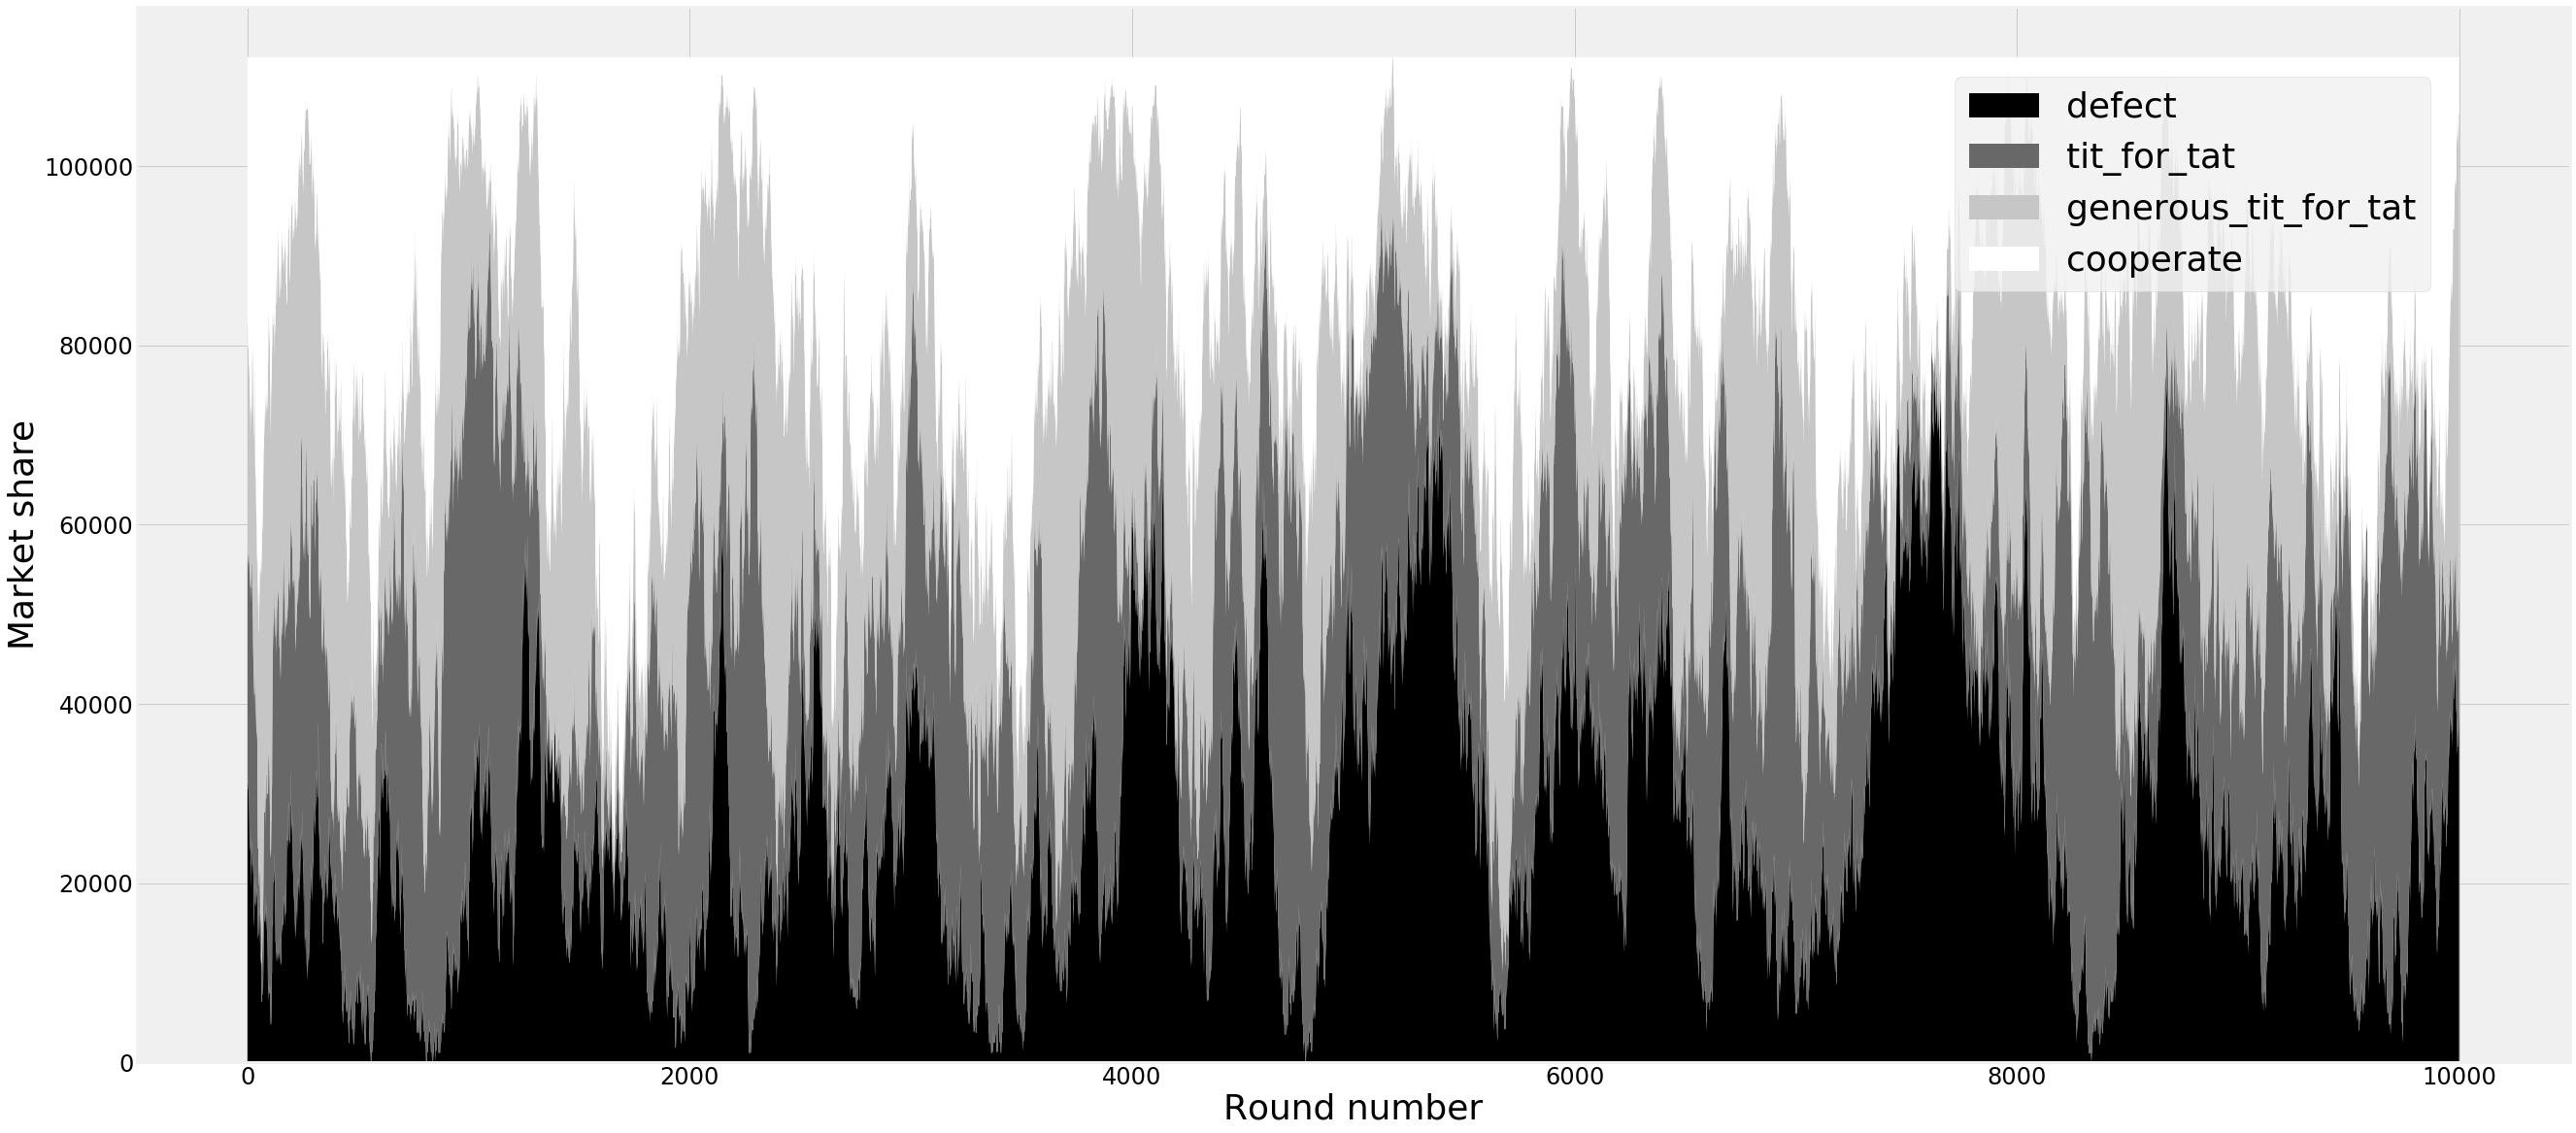

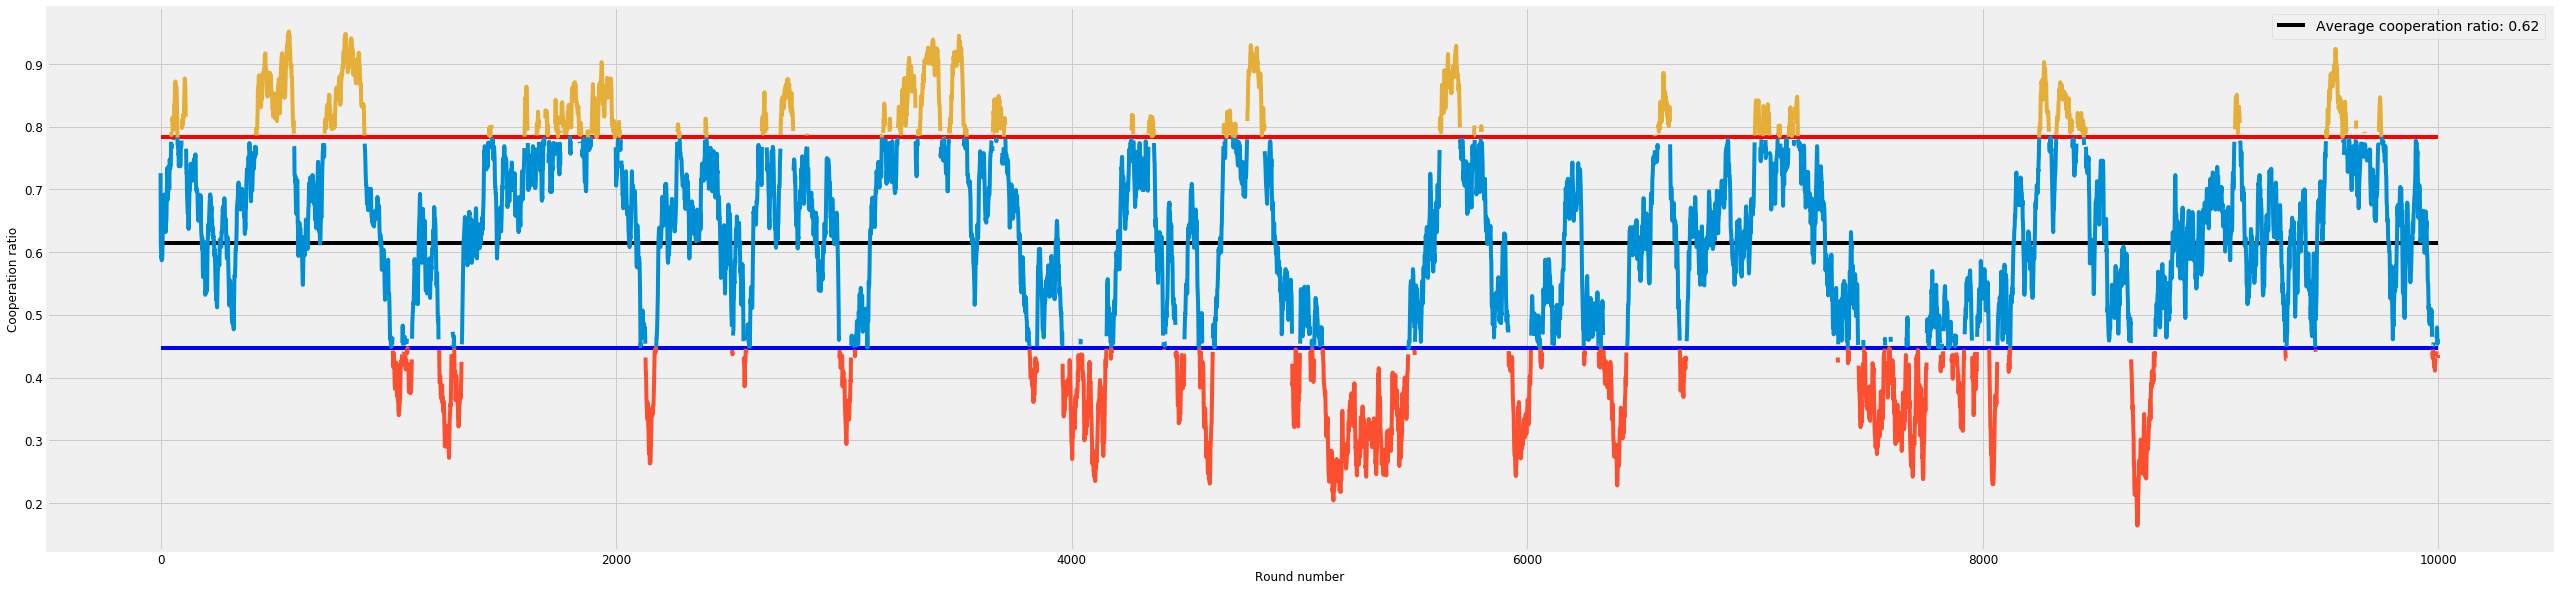

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values()), 'Seed': str(seed)}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "_outliercounts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, type_of_tournament= "_power_law_M", seed = str(seed))